In [82]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
ride_share = pd.merge(city_data, ride_data, on="city", how="outer")        #joins

# Display the data table for preview
ride_share.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

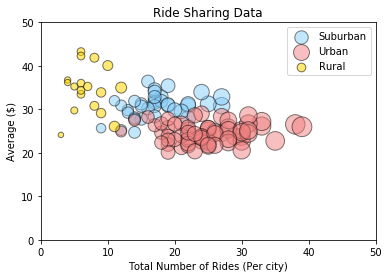

In [83]:
# Obtain the x and y coordinates for each of the three city types
suburban_city = ride_share.loc[(ride_share.type == "Suburban")]
urban_city = ride_share.loc[(ride_share.type == "Urban")]
rural_city = ride_share.loc[(ride_share.type == "Rural")]



#Variables for cities 
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()



# Build the scatter plots for each city types
plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")


# Incorporate the other graph properties
plt.xlim(0, 50)
plt.ylim(0, 50)

# Create a legend
plt.title("Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average ($)")
plt.legend(loc='upper right')


## Total Fares by City Type

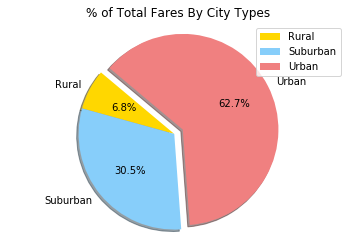

In [84]:
# Calculate Type Percents
total_fare = ride_share.groupby(['type'])['fare'].sum()

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)
plt.axis("equal")
plt.legend(loc='best')

# Save Figure
plt.savefig("data/% of Total Fares By City Types.png")


## Total Rides by City Type

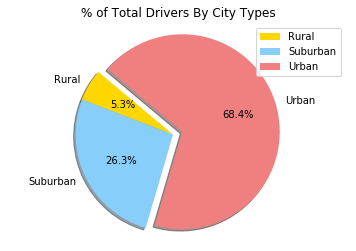

In [85]:
# Calculate Ride Percents
total_drivers = ride_share.groupby(['type'])['driver_count'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.legend(loc='best')

# Save Figure
plt.savefig("data/% of Total Rides By City Types.png")

## Total Drivers by City Type

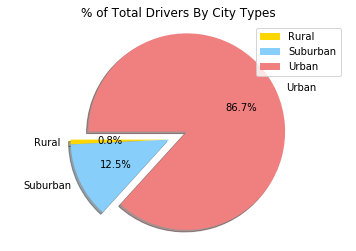

In [86]:
# Calculate Driver Percents
total_drivers = ride_share.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.2)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.legend(loc='best')

# Save Figure
plt.savefig("data/% of Total Drivers By City Types.png")
plt.show()